In [1]:
import pandas as pd
import json
from functools import reduce
import functools

In [2]:
with open ("output_clean_date_technical.json") as f:
    json_data = json.load(f)

In [3]:
list(json_data.keys())

['financialGrowth',
 'ratios',
 'cashFlowStatementGrowth',
 'incomeStatementGrowth',
 'balanceSheetStatementGrowth',
 'historicalPriceFull',
 'tech5',
 'tech20',
 'tech60',
 'tech252']

# <span style="color:red">financialGrowth</span>
<span style="color:red">以季度為單位，公司在不同財務方面的成長情況。</span>
# <span style="color:red">ratios</span>
<span style="color:red">以季度為單位，財務比率，這些比率常用於評估公司的財務健康狀況和表現。常見的財務比率有流動比率、速動比率、資產負債比率、毛利率、淨利率、ROE（股東權益報酬率）等。</span>
# <span style="color:red">cashFlowStatementGrowth</span>
<span style="color:red">以季度為單位，「現金流量表」的成長數據</span>
# <span style="color:red">incomeStatementGrowth</span>
<span style="color:red">以季度為單位，損益表的成長數據</span>
# <span style="color:red">balanceSheetStatementGrowth</span>
<span style="color:red">以季度為單位，「資產負債表」的成長數據</span>
# <span style="color:red">historicalPriceFull</span>
<span style="color:red">以日為單位，表該檔股票的完整歷史價格數據，包括開盤價、收盤價、最高價、最低價、交易量等。</span>
# <span style="color:red">tech5</span>
<span style="color:red">以日為單位，5天移動平均線的技術分析數據。</span>
# <span style="color:red">tech20</span>
<span style="color:red">以日為單位，20天移動平均線的技術分析數據。</span>
# <span style="color:red">tech60</span>
<span style="color:red">以日為單位，60天移動平均線的技術分析數據。</span>
# <span style="color:red">tech252</span>
<span style="color:red">以日為單位，252天（年）移動平均線的技術分析數據。</span>


# <h1>處理以季度為單位的資料</h1>

In [4]:
financialGrowth_df = pd.DataFrame(json_data["financialGrowth"])
ratios_df = pd.DataFrame(json_data["ratios"])
cashFlowStatementGrowth_df = pd.DataFrame(json_data["cashFlowStatementGrowth"])
incomeStatementGrowth_df = pd.DataFrame(json_data["incomeStatementGrowth"])
balanceSheetStatementGrowth_df = pd.DataFrame(json_data["balanceSheetStatementGrowth"])
print(f"shape financialGrowth_df:{financialGrowth_df.shape}")
print(f"shape ratios_df:{ratios_df.shape}")
print(f"shape cashFlowStatementGrowth_df:{cashFlowStatementGrowth_df.shape}")
print(f"shape incomeStatementGrowth_df:{incomeStatementGrowth_df.shape}")
print(f"shape balanceSheetStatementGrowth_df:{balanceSheetStatementGrowth_df.shape}")

shape financialGrowth_df:(12, 38)
shape ratios_df:(12, 58)
shape cashFlowStatementGrowth_df:(12, 34)
shape incomeStatementGrowth_df:(12, 30)
shape balanceSheetStatementGrowth_df:(12, 43)


In [5]:
json_data["cashFlowStatementGrowth"]

[{'date': '2023-10-30',
  'symbol': '1101.TW',
  'calendarYear': '2023',
  'period': 'Q3',
  'growthNetIncome': -0.43321375814033447,
  'growthDepreciationAndAmortization': 0.025546501043132098,
  'growthDeferredIncomeTax': 0,
  'growthStockBasedCompensation': 0,
  'growthChangeInWorkingCapital': 11.813888575328127,
  'growthAccountsReceivables': 0,
  'growthInventory': 0.02596774717180128,
  'growthAccountsPayables': 0,
  'growthOtherWorkingCapital': 1.0761794833415848,
  'growthOtherNonCashItems': 1.0492356415947193,
  'growthNetCashProvidedByOperatingActivites': 0.20810757628831764,
  'growthInvestmentsInPropertyPlantAndEquipment': 0.015310632322931027,
  'growthAcquisitionsNet': 1.0189970010986074,
  'growthPurchasesOfInvestments': 1.505572515420318,
  'growthSalesMaturitiesOfInvestments': -0.8589830853532306,
  'growthOtherInvestingActivites': 4.699612897433124,
  'growthNetCashUsedForInvestingActivites': 1.307573701693897,
  'growthDebtRepayment': 0.4357180362682367,
  'growthCom

In [6]:
#利用集合看季度資料是否有相同的欄位
financialGrowth_columns = set(financialGrowth_df.columns)
ratios_columns = set(ratios_df.columns)
cashFlowStatementGrowth_columns = set(cashFlowStatementGrowth_df.columns)
incomeStatementGrowth_columns = set(incomeStatementGrowth_df.columns)
balanceSheetStatementGrowth_columns = set(balanceSheetStatementGrowth_df.columns)
financialGrowth_columns.intersection(ratios_columns).\
    intersection(cashFlowStatementGrowth_columns).\
    intersection(incomeStatementGrowth_columns).\
    intersection(balanceSheetStatementGrowth_columns)

{'calendarYear', 'date', 'period', 'symbol'}

In [7]:
#將季度資料合併
season_df_list = [financialGrowth_df, ratios_df, cashFlowStatementGrowth_df, incomeStatementGrowth_df, balanceSheetStatementGrowth_df]
season_df_tag = ["_financialGrowth","_ratios","_cashFlowStatementGrowth","_incomeStatementGrowth","_balanceSheetStatementGrowth"]
season_df = functools.reduce(
    lambda l,r:l.merge(r,
                        left_on=['calendarYear', 'date', 'period', 'symbol'],
                        right_on=['calendarYear', 'date', 'period', 'symbol'],
                        how = "outer"),
    season_df_list)
print(f"shpae season_df:{season_df.shape}")
print("季度資料合併後NA值數量:",season_df.isna().sum().sum())

shpae season_df:(12, 187)
季度資料合併後NA值數量: 0


In [8]:
season_df.head()

,symbol,date,calendarYear,period,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,...,growthTotalLiabilities,growthCommonStock,growthRetainedEarnings,growthAccumulatedOtherComprehensiveIncomeLoss,growthOthertotalStockholdersEquity,growthTotalStockholdersEquity,growthTotalLiabilitiesAndStockholdersEquity,growthTotalInvestments,growthTotalDebt,growthNetDebt
0,1101.TW,2021-01-31,2020,Q4,0.077498,-0.017066,-0.060434,-0.060434,-0.104454,-0.118644,...,-0.006729,0.011993,0.100692,0,0.047958,0.055166,0.026621,-0.041090,-0.025107,-0.126830
1,1101.TW,2021-04-30,2021,Q1,-0.313870,-0.467413,-0.505282,-0.505282,-0.504044,-0.500000,...,-0.036521,0.025332,0.039989,0,0.031521,0.032529,0.001455,-0.004937,-0.081935,-0.248028
2,1101.TW,2021-07-30,2021,Q2,0.269904,0.558205,0.674078,0.674078,1.269705,0.980769,...,-0.043577,0.027888,0.114304,0,-0.059191,0.029528,-0.005813,-0.065672,-0.004348,-0.100927
3,1101.TW,2021-10-30,2021,Q3,-0.039459,-0.398781,-0.452565,-0.452565,-0.471069,-0.475728,...,0.147402,0.000101,-0.201696,0,0.031308,-0.070147,0.035005,0.004984,0.195354,0.537450
4,1101.TW,2022-01-31,2021,Q4,0.121096,0.418260,0.985599,0.985599,0.360230,0.370370,...,0.197107,0.000169,0.077151,0,-0.036428,0.013695,0.100413,-0.021277,0.230602,-0.005378


# <h1>處理以日為單位的資料</h1>

In [9]:
json_data["historicalPriceFull"]["symbol"]  #確認歷史資料的symbol只有一檔股票

'1101.TW'

In [10]:
historicalPriceFull_df = pd.DataFrame(json_data["historicalPriceFull"]["historical"])
tech5_df = pd.DataFrame(json_data["tech5"])
tech20_df = pd.DataFrame(json_data["tech20"])
tech60_df = pd.DataFrame(json_data["tech60"])
tech252_df = pd.DataFrame(json_data["tech252"])
print(f"shape historicalPriceFull_df:{historicalPriceFull_df.shape}")
print(f"shape tech5_df:{tech5_df.shape}")
print(f"shape tech20_df:{tech20_df.shape}")
print(f"shape tech60_df:{tech60_df.shape}")
print(f"shape tech252:{tech252_df.shape}")

shape historicalPriceFull_df:(736, 13)
shape tech5_df:(736, 15)
shape tech20_df:(736, 15)
shape tech60_df:(736, 15)
shape tech252:(736, 15)


In [11]:
#日期格式不同，故重新調整
tech5_df["date"] = tech5_df["date"].str.split(" ").str[0]
tech20_df["date"] = tech20_df["date"].str.split(" ").str[0]
tech60_df["date"] = tech60_df["date"].str.split(" ").str[0]
tech252_df["date"] = tech252_df["date"].str.split(" ").str[0]

In [12]:
historicalPriceFull_columns = set(historicalPriceFull_df.columns)
tech5_columns = set(tech5_df.columns)
tech20_columns = set(tech20_df.columns)
tech60_columns = set(tech60_df.columns)
tech252_columns = set(tech252_df.columns)
print("以日為單位之資料共有的欄位名稱:")
print(historicalPriceFull_columns.intersection(tech5_columns).\
    intersection(tech20_columns).\
    intersection(tech60_columns).\
    intersection(tech252_columns))
print("檢查技術指標資料之欄位名稱完全相同")
tech5_columns==tech20_columns==tech60_columns==tech252_columns

以日為單位之資料共有的欄位名稱:
{'high', 'volume', 'close', 'open', 'low', 'date'}
檢查技術指標資料之欄位名稱完全相同


True

In [13]:
###檢查完整歷史價錢資料與技術指標之'close', 'high', 'low', 'open', 'volume'欄位之值是否相同
tech_df_list = [tech5_df , tech20_df , tech60_df , tech252_df]
tech_df_tag_list = ["_5","_20","_60","_252"]
for i in range(len(tech_df_list)):
    df_combine = historicalPriceFull_df.merge(tech_df_list[i] , 
                                left_on=['close', 'date', 'high', 'low', 'open', 'volume'],
                                right_on=['close', 'date', 'high', 'low', 'open', 'volume'],
                                how="left")
    na_count = df_combine.isna().sum().sum()          
    if na_count ==0:  ##若以這幾個欄位能成功接起來沒有出現遺失值，代表這幾個columns在每個資料集中有重複的，則可以將其去除
        tech_df_list[i].drop(columns=['close', 'high', 'low', 'open', 'volume'],inplace=True) 
        for col in list(tech_df_list[i].columns):
            if col!="date":
                tech_df_list[i].rename(columns={col:col+tech_df_tag_list[i]},inplace=True) #移動平均指標分為5 20 60 252日 將其column 重新命名


In [14]:
# 將以日為單位的技術指標進行合併
date_df = historicalPriceFull_df
for i in range(len(tech_df_list)):
    date_df = date_df.merge(tech_df_list[i],
                            left_on = "date",
                            right_on = "date",
                            how = "outer")        

In [15]:
#將以日為單位的資料加上季度標示
date_df["date"] = pd.to_datetime(date_df["date"])
def period_define_for_date_df(df):
    year = df["date"].year
    month = df["date"].month
    if 1<=month<=3:
        return(f"{year-1}Q4")
    elif 4<=month<=6:
        return(f"{year}Q1")
    elif 7<=month<=9:
        return(f"{year}Q2")
    elif 10<=month<=12:
        return(f"{year}Q3")
    else:
        return("others")
date_df["last_quarter_report_period"] = date_df.apply(period_define_for_date_df,axis=1)

In [16]:
#將以季度為單位的資料加上季度標示(以當下知道的財報為準)
season_df["date"] = pd.to_datetime(season_df["date"])
season_df["calendarYear"] = season_df["calendarYear"].astype(int)
def period_define_for_season_df(df):
    if df["period"]=="Q1":
        return(f"{df["calendarYear"]-1}Q4")
    elif df["period"]=="Q2":
        return(f"{df["calendarYear"]}Q1")
    elif df["period"]=="Q3":
        return(f"{df["calendarYear"]}Q2")
    elif df["period"]=="Q4":
        return(f"{df["calendarYear"]}Q3")
    else:
        return("others")
season_df["last_quarter_report_period"] = season_df.apply(period_define_for_season_df,axis=1)

In [17]:
season_df.drop(columns=["date"],inplace=True)

In [70]:
df = date_df.merge(season_df,
              left_on=["last_quarter_report_period"],
              right_on = ["last_quarter_report_period"],
              how="left")

In [71]:
cols = list(df.columns)
symbol_index = cols.index("symbol")
cols.insert(1, cols.pop(symbol_index))
df = df[cols]

In [72]:
df["close_after_90"] = df["close"].shift(-90)
df["target"] = df.apply(lambda df: 1 if df['close_after_90'] > df['close'] * 1.1 else 0, axis=1)

In [73]:

df.to_csv("df_combine.csv",index=False,encoding="utf-8-sig")

# <h1>EDA-畫出時間序列圖片</h1>

In [82]:
import matplotlib.pyplot as plt

In [ ]:
df.set_index('date', inplace=True)

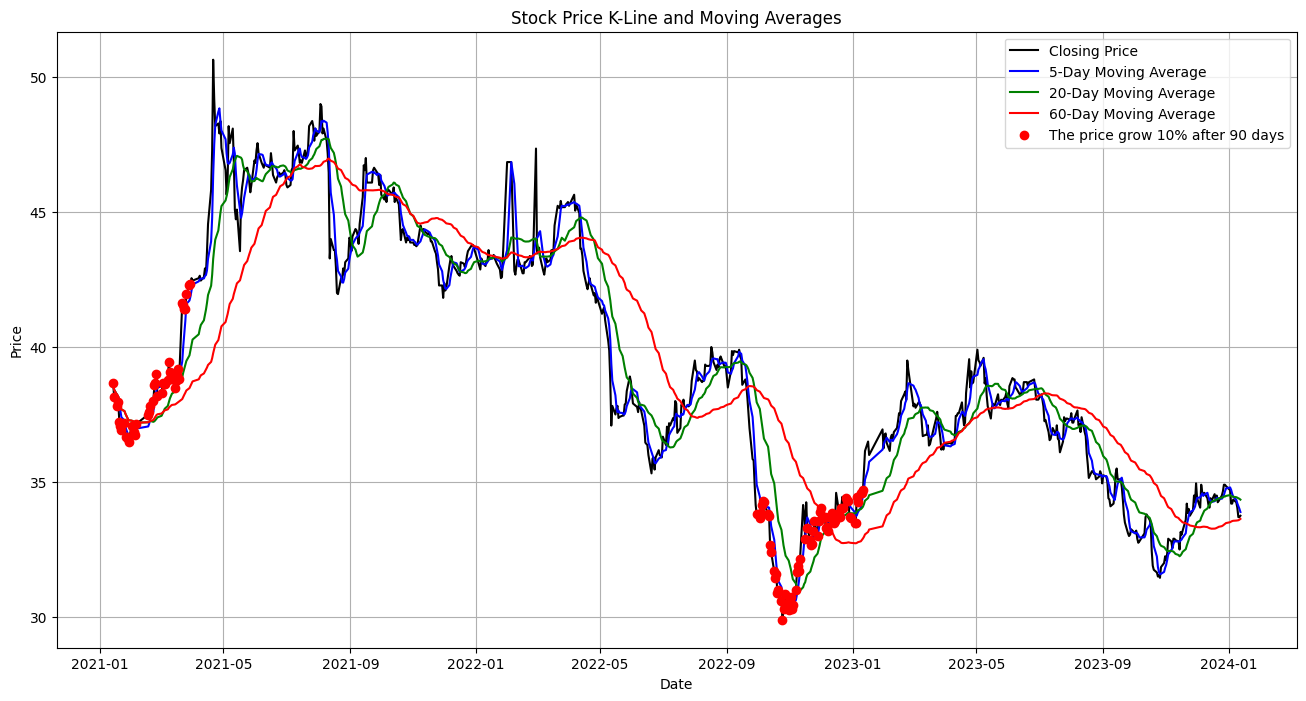

In [81]:
#df.set_index('date', inplace=True)
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(df.index, df['close'], label='Closing Price', color='black')
ax.plot(df.index, df['sma_5'], label='5-Day Moving Average', color='blue')
ax.plot(df.index, df['sma_20'], label='20-Day Moving Average', color='green')
ax.plot(df.index, df['sma_60'], label='60-Day Moving Average', color='red')

target_1 = df[df['target'] == 1]
ax.scatter(target_1.index, target_1['close'], color='red', label='The price grow 10% after 90 days', zorder=5)

ax.set_title('Stock Price K-Line and Moving Averages')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.grid(True)
plt.show()

# <h1>EDA-ACF 以及 PACF</h1>

In [91]:
from statsmodels.graphics.tsaplots import plot_acf ,plot_pacf

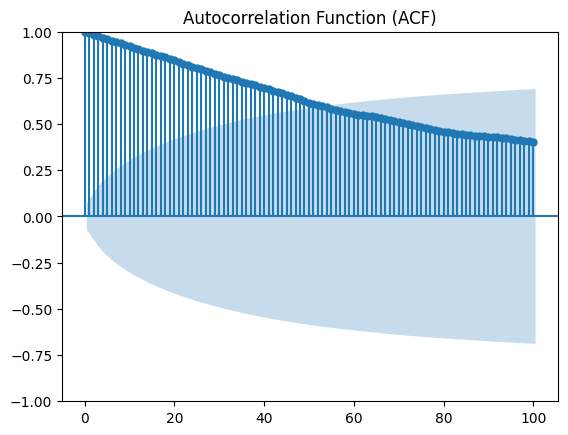

In [92]:
plot_acf(df['close'], lags=100)
plt.title('Autocorrelation Function (ACF)')
plt.show()

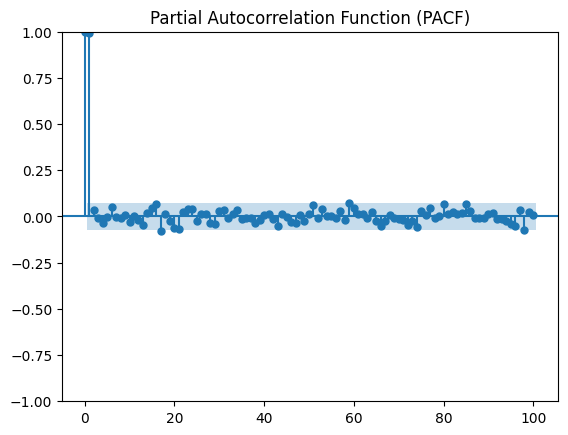

In [96]:
# 計算並繪製偏自相關函數
plot_pacf(df['close'], lags=100)
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [38]:
columns_with_x = [col for col in df.columns if col.endswith('_x')]
columns_with_x

['growthNetIncome_x',
 'growthDepreciationAndAmortization_x',
 'growthInventory_x']

In [39]:
df["growthDepreciationAndAmortization_x"]

0     -0.031339
1     -0.031339
2     -0.031339
3     -0.031339
4     -0.031339
         ...   
731         NaN
732         NaN
733         NaN
734         NaN
735         NaN
Name: growthDepreciationAndAmortization_x, Length: 736, dtype: float64

In [40]:
df["growthDepreciationAndAmortization_y"]

0     -0.031339
1     -0.031339
2     -0.031339
3     -0.031339
4     -0.031339
         ...   
731         NaN
732         NaN
733         NaN
734         NaN
735         NaN
Name: growthDepreciationAndAmortization_y, Length: 736, dtype: float64

In [41]:
df["growthInventory_x"]

0     -1.522817
1     -1.522817
2     -1.522817
3     -1.522817
4     -1.522817
         ...   
731         NaN
732         NaN
733         NaN
734         NaN
735         NaN
Name: growthInventory_x, Length: 736, dtype: float64

In [42]:
df["growthInventory_y"]

0     -0.02038
1     -0.02038
2     -0.02038
3     -0.02038
4     -0.02038
        ...   
731        NaN
732        NaN
733        NaN
734        NaN
735        NaN
Name: growthInventory_y, Length: 736, dtype: float64

In [22]:
df["growthNetIncome_x"]

0     -0.46946
1     -0.46946
2     -0.46946
3     -0.46946
4     -0.46946
        ...   
731        NaN
732        NaN
733        NaN
734        NaN
735        NaN
Name: growthNetIncome_x, Length: 736, dtype: float64

In [23]:
df["growthNetIncome_y"]

0     -0.504044
1     -0.504044
2     -0.504044
3     -0.504044
4     -0.504044
         ...   
731         NaN
732         NaN
733         NaN
734         NaN
735         NaN
Name: growthNetIncome_y, Length: 736, dtype: float64

In [25]:
df.to_csv("df_combine.csv",index=False,encoding="utf-8-sig")

In [20]:
df = date_df.merge(season_df,
                   left_on=["date"],
                   right_on=["date"],
                   how="left")

In [21]:
df["symbol"] = "1101.TW"

In [22]:
cols = list(df.columns)
symbol_index = cols.index('symbol')
cols.insert(1, cols.pop(symbol_index))
df = df[cols]

In [24]:
df

,date,symbol,open,high,low,close,adjClose,volume,unadjustedVolume,change,...,growthTotalLiabilities,growthCommonStock,growthRetainedEarnings,growthAccumulatedOtherComprehensiveIncomeLoss,growthOthertotalStockholdersEquity,growthTotalStockholdersEquity,growthTotalLiabilitiesAndStockholdersEquity,growthTotalInvestments,growthTotalDebt,growthNetDebt
128,2021-07-30,1101.TW,48.09,48.09,47.73,47.82,42.899300,13669323,13669323,-0.27,...,-0.043577,0.027888,0.114304,0.0,-0.059191,0.029528,-0.005813,-0.065672,-0.004348,-0.100927
253,2022-01-31,1101.TW,46.70,47.00,46.55,46.85,46.850000,7858213,7858213,0.15,...,0.197107,0.000169,0.077151,0.0,-0.036428,0.013695,0.100413,-0.021277,0.230602,-0.005378
499,2023-01-31,1101.TW,36.90,36.90,36.25,36.25,35.758415,23651274,23651274,-0.65,...,-0.061292,0.062350,0.035046,0.0,0.147958,0.081825,0.004524,0.041430,-0.083522,-0.100328
682,2023-10-30,1101.TW,31.80,32.10,31.75,32.00,32.000000,15829556,15829556,0.20,...,0.029640,0.000000,0.018448,0.0,0.093871,0.037866,0.036323,0.042211,0.053001,-0.110068


In [25]:
season_df

,symbol,date,calendarYear,period,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,...,growthTotalLiabilities,growthCommonStock,growthRetainedEarnings,growthAccumulatedOtherComprehensiveIncomeLoss,growthOthertotalStockholdersEquity,growthTotalStockholdersEquity,growthTotalLiabilitiesAndStockholdersEquity,growthTotalInvestments,growthTotalDebt,growthNetDebt
0,1101.TW,2021-01-31,2020,Q4,0.077498,-0.017066,-0.060434,-0.060434,-0.104454,-0.118644,...,-0.006729,0.011993,0.100692,0,0.047958,0.055166,0.026621,-0.041090,-0.025107,-0.126830
1,1101.TW,2021-04-30,2021,Q1,-0.313870,-0.467413,-0.505282,-0.505282,-0.504044,-0.500000,...,-0.036521,0.025332,0.039989,0,0.031521,0.032529,0.001455,-0.004937,-0.081935,-0.248028
2,1101.TW,2021-07-30,2021,Q2,0.269904,0.558205,0.674078,0.674078,1.269705,0.980769,...,-0.043577,0.027888,0.114304,0,-0.059191,0.029528,-0.005813,-0.065672,-0.004348,-0.100927
3,1101.TW,2021-10-30,2021,Q3,-0.039459,-0.398781,-0.452565,-0.452565,-0.471069,-0.475728,...,0.147402,0.000101,-0.201696,0,0.031308,-0.070147,0.035005,0.004984,0.195354,0.537450
4,1101.TW,2022-01-31,2021,Q4,0.121096,0.418260,0.985599,0.985599,0.360230,0.370370,...,0.197107,0.000169,0.077151,0,-0.036428,0.013695,0.100413,-0.021277,0.230602,-0.005378
5,1101.TW,2022-04-30,2022,Q1,-0.237690,-0.728039,-0.751558,-0.751558,-0.841968,-0.824324,...,0.004863,0.000000,0.016234,0,0.135529,0.050467,0.025253,-0.082409,0.015029,-0.060911
6,1101.TW,2022-07-30,2022,Q2,0.095953,-0.944750,-0.805463,-0.805463,-2.098317,-2.076923,...,0.074787,0.132504,-0.164690,0,-0.106221,-0.066921,-0.001246,-0.051612,0.029760,0.036472
7,1101.TW,2022-10-30,2022,Q3,0.236128,22.238472,7.563693,7.563693,2.604780,2.571429,...,0.016064,-0.028928,0.024052,0,-0.007487,0.004948,0.014282,0.055808,0.055059,0.204987
8,1101.TW,2023-01-31,2022,Q4,0.113496,1.021971,0.482921,0.482921,0.647513,0.636364,...,-0.061292,0.062350,0.035046,0,0.147958,0.081825,0.004524,0.041430,-0.083522,-0.100328
9,1101.TW,2023-04-30,2023,Q1,-0.241216,-0.523558,-0.571776,-0.571776,-0.595665,-0.611111,...,-0.004340,0.000000,0.021151,0,0.009963,0.010015,0.001822,0.056414,-0.032070,0.162942


In [181]:
date_df.to_csv("date.csv" , index=False ,encoding="utf-8-sig")
season_df.to_csv("season_df.csv" , index=False ,encoding="utf-8-sig")

date_df.isna().sum().sum()

In [160]:
date_df["date"] = pd.to_datetime(date_df["date"])


In [166]:
date_df["date"][0].month

1

In [168]:
def period_define(x):
    if 1<=x.month<=3:
        return("Q1")
    elif 4<=x.month<=6:
        return("Q2")
    elif 7<=x.month<=9:
        return("Q3")
    elif 10<=x.month<=12:
        return("Q4")
    else:
        return("others")
date_df["period"] = date_df["date"].apply(period_define)

In [170]:
season_df.drop

,symbol,date,calendarYear,period,revenueGrowth,grossProfitGrowth,ebitgrowth,operatingIncomeGrowth,netIncomeGrowth,epsgrowth,...,growthTotalLiabilities,growthCommonStock,growthRetainedEarnings,growthAccumulatedOtherComprehensiveIncomeLoss,growthOthertotalStockholdersEquity,growthTotalStockholdersEquity,growthTotalLiabilitiesAndStockholdersEquity,growthTotalInvestments,growthTotalDebt,growthNetDebt
0,1101.TW,2023-10-30,2023,Q3,-0.024069,-0.035089,-0.181537,-0.181537,-0.647973,-0.622222,...,0.029640,0.000000,0.018448,0,0.093871,0.037866,0.036323,0.042211,0.053001,-0.110068
1,1101.TW,2023-07-30,2023,Q2,0.052187,1.423824,2.241177,2.241177,2.522023,2.214286,...,0.000248,0.000000,-0.005510,0,-0.068955,-0.026322,-0.011495,0.025920,-0.023537,0.161018
2,1101.TW,2023-04-30,2023,Q1,-0.241216,-0.523558,-0.571776,-0.571776,-0.595665,-0.611111,...,-0.004340,0.000000,0.021151,0,0.009963,0.010015,0.001822,0.056414,-0.032070,0.162942
3,1101.TW,2023-01-31,2022,Q4,0.113496,1.021971,0.482921,0.482921,0.647513,0.636364,...,-0.061292,0.062350,0.035046,0,0.147958,0.081825,0.004524,0.041430,-0.083522,-0.100328
4,1101.TW,2022-10-30,2022,Q3,0.236128,22.238472,7.563693,7.563693,2.604780,2.571429,...,0.016064,-0.028928,0.024052,0,-0.007487,0.004948,0.014282,0.055808,0.055059,0.204987
5,1101.TW,2022-07-30,2022,Q2,0.095953,-0.944750,-0.805463,-0.805463,-2.098317,-2.076923,...,0.074787,0.132504,-0.164690,0,-0.106221,-0.066921,-0.001246,-0.051612,0.029760,0.036472
6,1101.TW,2022-04-30,2022,Q1,-0.237690,-0.728039,-0.751558,-0.751558,-0.841968,-0.824324,...,0.004863,0.000000,0.016234,0,0.135529,0.050467,0.025253,-0.082409,0.015029,-0.060911
7,1101.TW,2022-01-31,2021,Q4,0.121096,0.418260,0.985599,0.985599,0.360230,0.370370,...,0.197107,0.000169,0.077151,0,-0.036428,0.013695,0.100413,-0.021277,0.230602,-0.005378
8,1101.TW,2021-10-30,2021,Q3,-0.039459,-0.398781,-0.452565,-0.452565,-0.471069,-0.475728,...,0.147402,0.000101,-0.201696,0,0.031308,-0.070147,0.035005,0.004984,0.195354,0.537450
9,1101.TW,2021-07-30,2021,Q2,0.269904,0.558205,0.674078,0.674078,1.269705,0.980769,...,-0.043577,0.027888,0.114304,0,-0.059191,0.029528,-0.005813,-0.065672,-0.004348,-0.100927


In [169]:
date_df

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,...,sma_252,ema_252,wma_252,dema_252,tema_252,williams_252,rsi_252,adx_252,standardDeviation_252,period
0,2024-01-12,33.70,33.80,33.60,33.75,33.750000,5221622,5221622,0.05,0.14837,...,35.925794,35.464153,35.180345,33.758654,33.572743,-73.033708,58.030311,11.549357,2.062031,Q1
1,2024-01-11,33.70,33.80,33.60,33.70,33.700000,6590499,6590499,0.00,0.00000,...,35.927976,35.477811,35.197563,33.772382,33.585058,-73.595506,57.998561,11.561317,2.060017,Q1
2,2024-01-10,34.05,34.05,33.70,33.70,33.700000,10231832,10231832,-0.35,-1.03000,...,35.930754,35.491977,35.215197,33.787124,33.598885,-73.595506,57.998561,11.573325,2.057482,Q1
3,2024-01-09,34.30,34.30,34.05,34.05,34.050000,6191243,6191243,-0.25,-0.72886,...,35.932143,35.506256,35.232842,33.802097,33.613052,-69.662921,58.304875,11.584803,2.056093,Q1
4,2024-01-08,34.40,34.55,34.25,34.25,34.250000,5522713,5522713,-0.15,-0.43605,...,35.933730,35.517860,35.247734,33.811725,33.619199,-67.415730,58.480667,11.594301,2.054793,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,2021-01-20,37.87,37.91,37.09,37.23,33.397839,38529978,38529978,-0.64,-1.69000,...,37.966000,38.652031,37.760667,38.624533,38.597498,-92.307692,0.000000,0.000000,0.469706,Q1
732,2021-01-19,37.82,38.18,37.82,37.96,34.050301,13261660,13261660,0.14,0.37017,...,38.150000,38.663362,38.026000,38.646975,38.630837,-74.803150,0.000000,0.000000,0.326343,Q1
733,2021-01-18,38.14,38.14,37.64,37.82,33.927963,27598255,27598255,-0.32,-0.83901,...,38.213333,38.668967,38.070000,38.658054,38.647261,-85.826772,0.000000,0.000000,0.354902,Q1
734,2021-01-15,38.64,38.64,38.14,38.14,34.213417,33681520,33681520,-0.50,-1.29000,...,38.410000,38.675731,38.320000,38.671496,38.667295,-100.000000,0.000000,0.000000,0.270000,Q1


In [20]:
season_list = ['financialGrowth','ratios','cashFlowStatementGrowth','incomeStatementGrowth','balanceSheetStatementGrowth']

In [23]:
df_season = pd.DataFrame(df["balanceSheetStatementGrowth"])
for s in range(1,len(df_season)):
    df_season.merge(pd.DataFrame(df["balanceSheetStatementGrowth"]))

12
12
12
12
12


In [ ]:
df_season = pd.DataFrame(df["balanceSheetStatementGrowth"])

In [11]:
pd.DataFrame(df["historicalPriceFull"]["historical"])["date"].nunique()

736

In [12]:
pd.DataFrame(df["tech5"])["date"].nunique()

736

In [5]:
pd.DataFrame(df["balanceSheetStatementGrowth"])

,date,symbol,calendarYear,period,growthCashAndCashEquivalents,growthShortTermInvestments,growthCashAndShortTermInvestments,growthNetReceivables,growthInventory,growthOtherCurrentAssets,...,growthTotalLiabilities,growthCommonStock,growthRetainedEarnings,growthAccumulatedOtherComprehensiveIncomeLoss,growthOthertotalStockholdersEquity,growthTotalStockholdersEquity,growthTotalLiabilitiesAndStockholdersEquity,growthTotalInvestments,growthTotalDebt,growthNetDebt
0,2023-10-30,1101.TW,2023,Q3,0.374898,-0.229646,0.084818,0.044234,-0.073113,0.063258,...,0.029640,0.000000,0.018448,0,0.093871,0.037866,0.036323,0.042211,0.053001,-0.110068
1,2023-07-30,1101.TW,2023,Q2,-0.256756,0.286307,-0.067939,-0.048948,-0.080494,-0.160012,...,0.000248,0.000000,-0.005510,0,-0.068955,-0.026322,-0.011495,0.025920,-0.023537,0.161018
2,2023-04-30,1101.TW,2023,Q1,-0.201315,0.375261,-0.065026,-0.070905,-0.019686,0.069697,...,-0.004340,0.000000,0.021151,0,0.009963,0.010015,0.001822,0.056414,-0.032070,0.162942
3,2023-01-31,1101.TW,2022,Q4,-0.068420,0.119469,-0.029935,0.055477,-0.090077,-0.002770,...,-0.061292,0.062350,0.035046,0,0.147958,0.081825,0.004524,0.041430,-0.083522,-0.100328
4,2022-10-30,1101.TW,2022,Q3,-0.051046,-0.016017,-0.044076,0.065405,-0.034728,0.100690,...,0.016064,-0.028928,0.024052,0,-0.007487,0.004948,0.014282,0.055808,0.055059,0.204987
5,2022-07-30,1101.TW,2022,Q2,0.025063,-0.098387,-0.002125,-0.085211,0.351734,0.208118,...,0.074787,0.132504,-0.164690,0,-0.106221,-0.066921,-0.001246,-0.051612,0.029760,0.036472
6,2022-04-30,1101.TW,2022,Q1,0.075925,0.243942,0.108912,-0.019939,0.010415,0.029699,...,0.004863,0.000000,0.016234,0,0.135529,0.050467,0.025253,-0.082409,0.015029,-0.060911
7,2022-01-31,1101.TW,2021,Q4,0.519742,0.027066,0.388936,-0.001505,0.193422,0.316969,...,0.197107,0.000169,0.077151,0,-0.036428,0.013695,0.100413,-0.021277,0.230602,-0.005378
8,2021-10-30,1101.TW,2021,Q3,-0.060725,0.542197,0.048062,-0.099363,0.241820,0.132356,...,0.147402,0.000101,-0.201696,0,0.031308,-0.070147,0.035005,0.004984,0.195354,0.537450
9,2021-07-30,1101.TW,2021,Q2,0.082713,-0.094814,0.045709,-0.028677,0.163277,-0.156525,...,-0.043577,0.027888,0.114304,0,-0.059191,0.029528,-0.005813,-0.065672,-0.004348,-0.100927


In [20]:
df["historicalPriceFull"]["historical"]

[{'date': '2024-01-12',
  'open': 33.7,
  'high': 33.8,
  'low': 33.6,
  'close': 33.75,
  'adjClose': 33.75,
  'volume': 5221622,
  'unadjustedVolume': 5221622,
  'change': 0.05,
  'changePercent': 0.14837,
  'vwap': 33.72,
  'label': 'January 12, 24',
  'changeOverTime': 0.0014837},
 {'date': '2024-01-11',
  'open': 33.7,
  'high': 33.8,
  'low': 33.6,
  'close': 33.7,
  'adjClose': 33.7,
  'volume': 6590499,
  'unadjustedVolume': 6590499,
  'change': 0,
  'changePercent': 0,
  'vwap': 33.7,
  'label': 'January 11, 24',
  'changeOverTime': 0},
 {'date': '2024-01-10',
  'open': 34.05,
  'high': 34.05,
  'low': 33.7,
  'close': 33.7,
  'adjClose': 33.7,
  'volume': 10231832,
  'unadjustedVolume': 10231832,
  'change': -0.35,
  'changePercent': -1.03,
  'vwap': 33.82,
  'label': 'January 10, 24',
  'changeOverTime': -0.0103},
 {'date': '2024-01-09',
  'open': 34.3,
  'high': 34.3,
  'low': 34.05,
  'close': 34.05,
  'adjClose': 34.05,
  'volume': 6191243,
  'unadjustedVolume': 6191243,
